# Project One #

In [7]:
from IPython.display import Image


## Question 1 ##
Run the model in the default configuration we have used in class. We will call this the control
trajectory of the model. For a variety of points along the control trajectory, compute the propagator
matrix (**M**) for a 1.0 time unit forecast (hereafter denoted $t_f$ ) using the code provided. At each
of these points, use the propagator matrix to predict the forecast error via the Euclidean norm for
different sized isotropic initial condition errors (i.e., change the magnitude of the error in variable
ic_error)). Next, compute the forecast error with the non-linear model by adding the isotropic
error to the control trajectory and integrating the nonlinear model forward. How does the linear
prediction of the forecast error compare to the actual error? Are there locations within the state
space volume where the linear model errors disagree with the nonlinear model? What does that
say about the Lorenz 63 model at these points?
---

We want to look at a variety of points along the true trajectory of the Lorenz model which spans 20,000 steps, and we maintain the 1.0 time unit forecast, corresponding to 500 steps. I chose to look at windows every 250 steps along the trajectory (e.g. `[0-500],[250-750],...,[19500-20000]`). For each window, the control trajectory is already established, a forecast error is found by stepping through numerically with an initial perturbation `ic_error`, and a linear prediction of the error is constructed using a tangent linear matrix. These following error calculations are represented visually below. The analysis looked at windows every 250 steps with isotropic errors between 0.0 and 1.0 inclusive (i.e. 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0). 

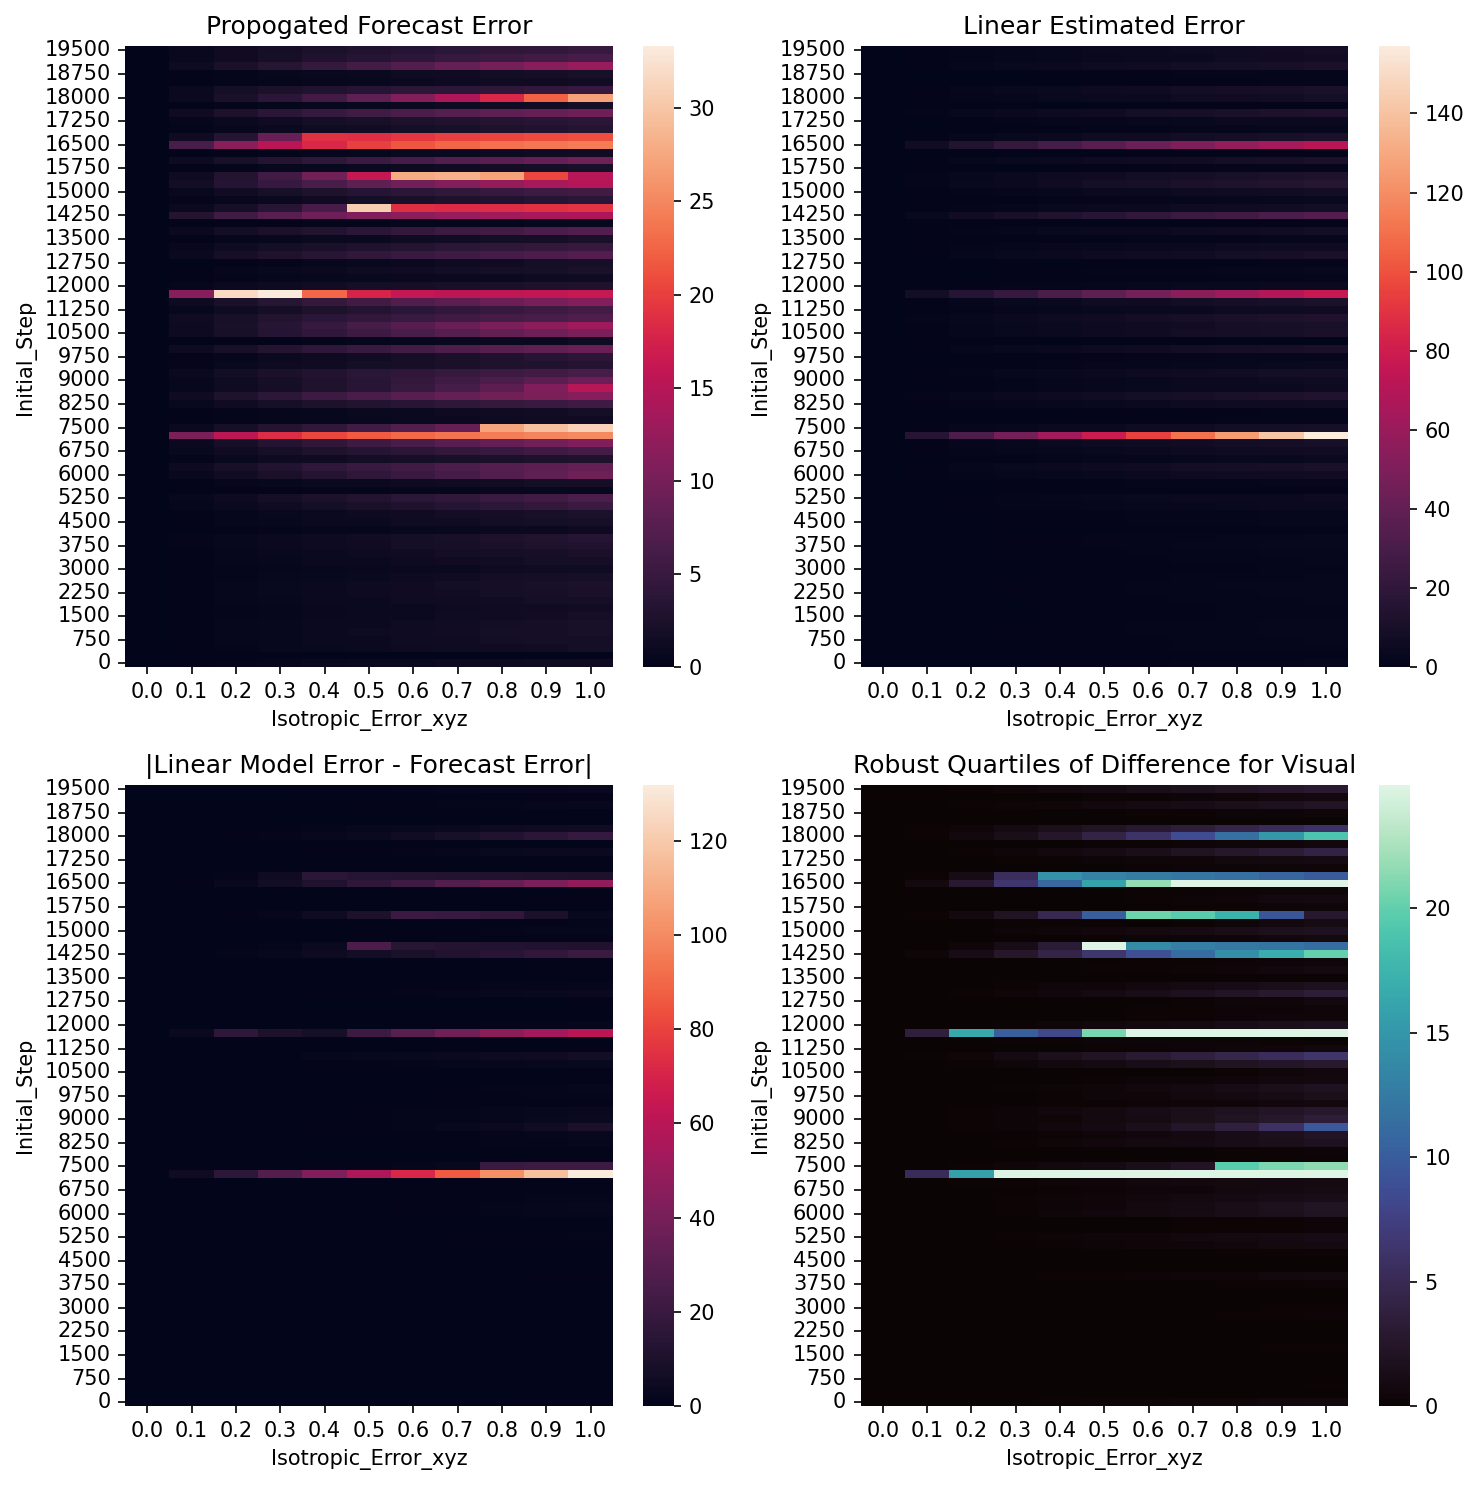

In [36]:
Image("./Images_Project_1/q1_Heatmaps.png", width=1000)

These figures show the relationship between different perturbations (i.e. different values of isotropic error) and the initial step of the forecast window. The first two plots show the absolute propogated forecast error and the predicted linear model of error. A couple of observations:
* Generally, the linear model of error seems to overpredict the error in a few key intervals compared to the forecasted error. They do share the intervals with the highest levels of error, but the linear model emphasizes the error much more.
* The linear model misses some nuance in the forecasted error. For example, the window from step 11750 to 12250 exhibits some unexpected behavior where there is significantly higher forecast error with isotropic error of 0.2 and 0.3 compared to higher levels of isotropic error. This is likely due to the unpredictable nature of perturbations; the model will respond in different ways at different points along the trajectory. However, the linear model of error completely misses this anomaly, and it exhibits standard error increasing with isotropic error for the `[11750,12250]` window.

In the bottom figures, we can see the difference between the forecast error and the linear model error explicitly represented. The windows where the linear model overpredicts the error stand out as the largest differences between the two approaches. The secondary graph normalizes some of more extreme magnitudes, so we can visually see these windows more clearly. There appears to be more frequency in difference between the errors for later windows in the trajectory, but the windows of largest difference are somewhat sporadically distributed. We can draw out these specific intervals by looking at the mean difference in error for an entire window (averaging across the results for all isotropic error values). The following table presents the 10 largest mean differences in error. 

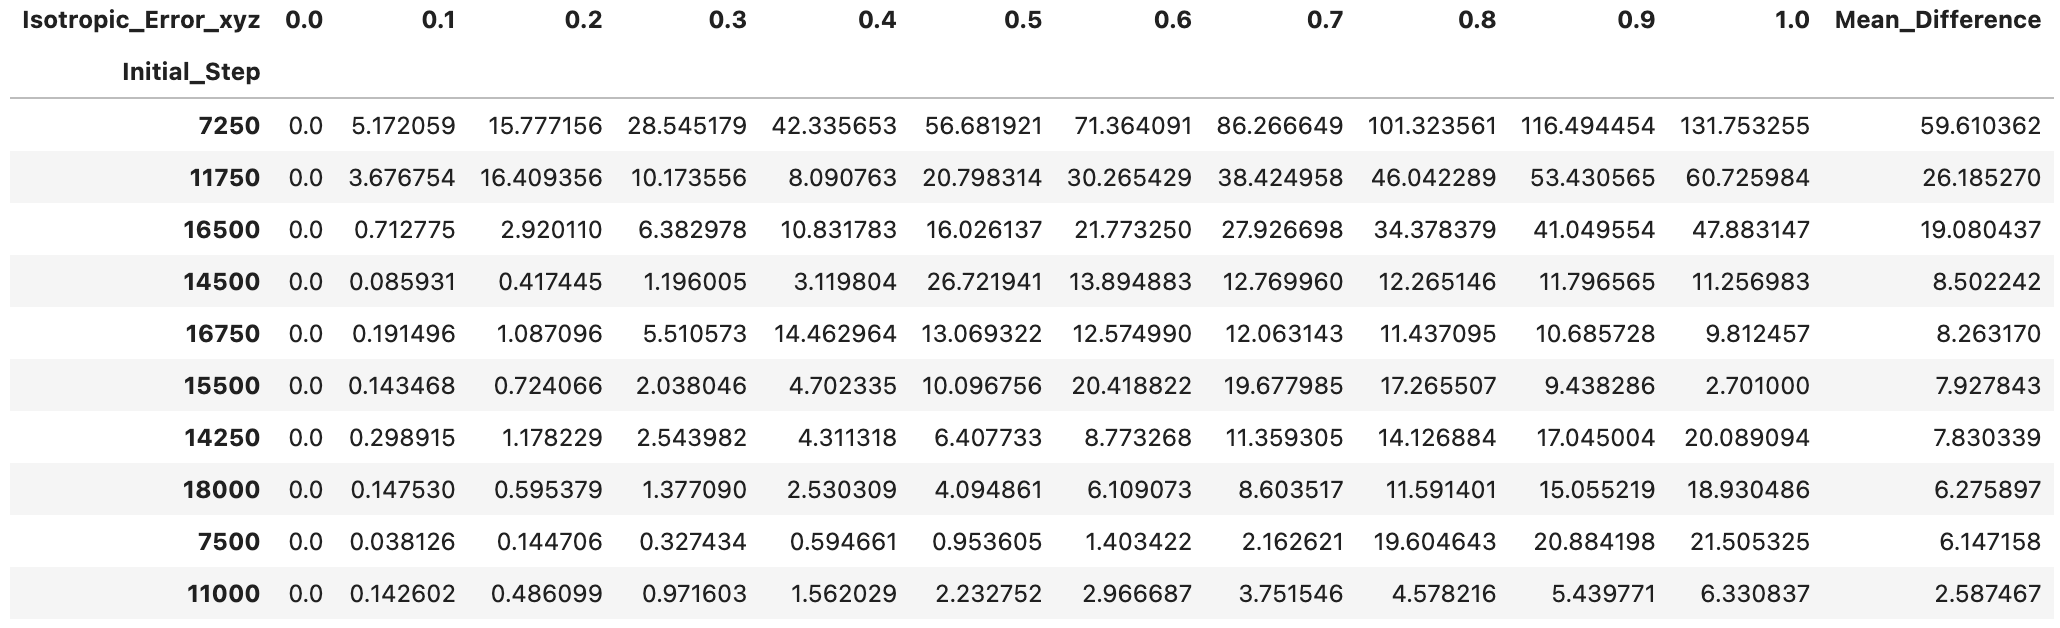

In [16]:
Image("./Images_Project_1/q1_table_top10.png", width=1100)

These windows (`[initial_step, initial_step+500]`) likely correspond to highly non-linear regions within the model trajectory, as the TLM tries to predict the forecast error, it might significantly overpredict or underpredict error because of the unpredictable nature of the models in these windows. We are likely not seeing a full picture of these highly non-linear windows because of the coarse step interval of 250. However, we can first look at where these steps fall in the space.

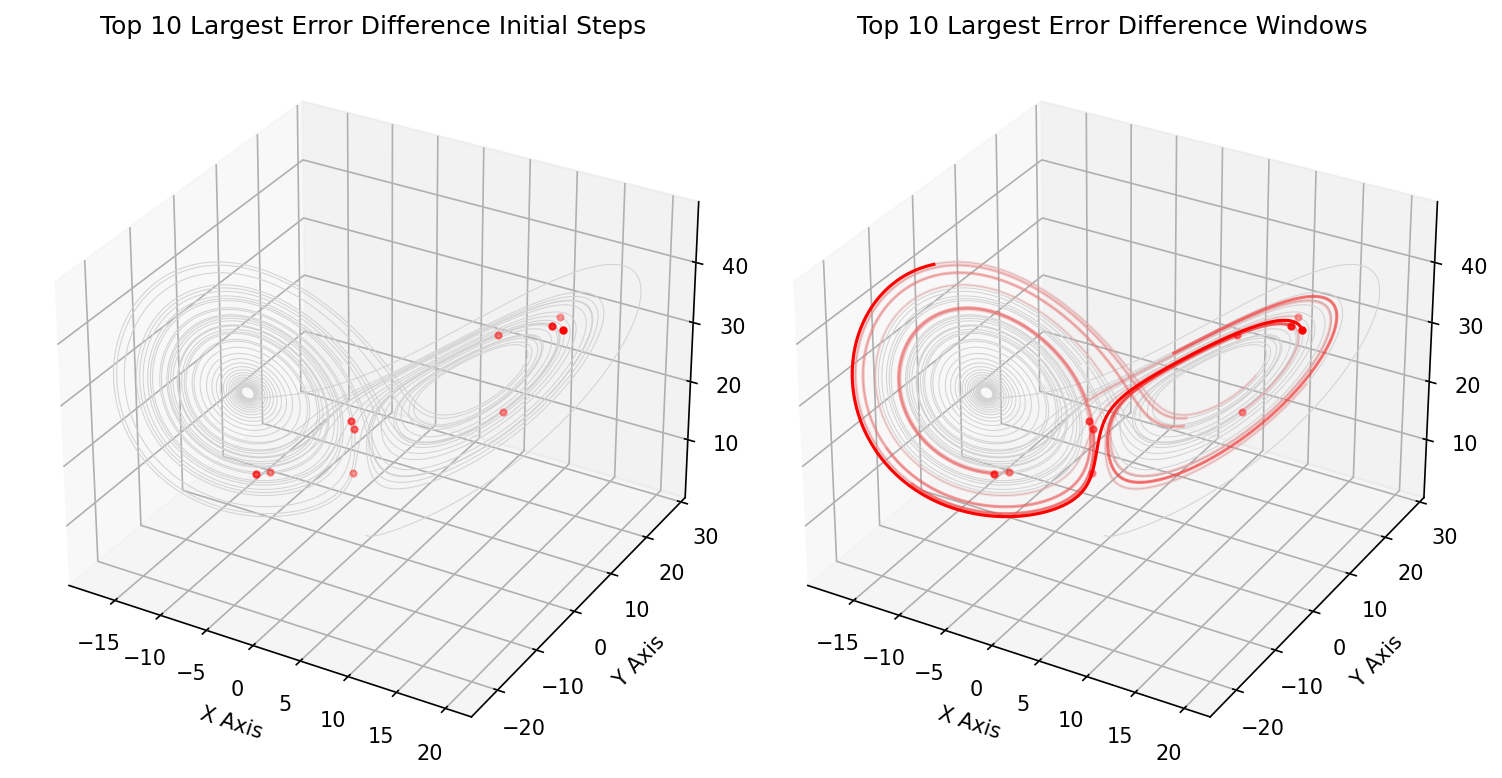

In [18]:
Image("./Images_Project_1/q1_lorenz3d_step250_top10_double.png", width=850)

The red dots mark the initial steps for these 10 windows of largest mean error difference (darker dots have a larger mean difference). Then we can see the actual windows/trajectories these initial steps represent on the right plot. It appears that nearly of these trajectories pass through center between the lobes where the trajectory is switching between attractors. This makes sense as a highly non-linear region, and the general dispersion of these initial steps could likely be due to the nature of the system and coarseness of our 250 step intervals.

We can test this idea by simply increasing the frequency of our initial steps. If we try an interval of 25 steps between windows, we will have 800 total windows accessing many more distinct parts of the trajectories. 

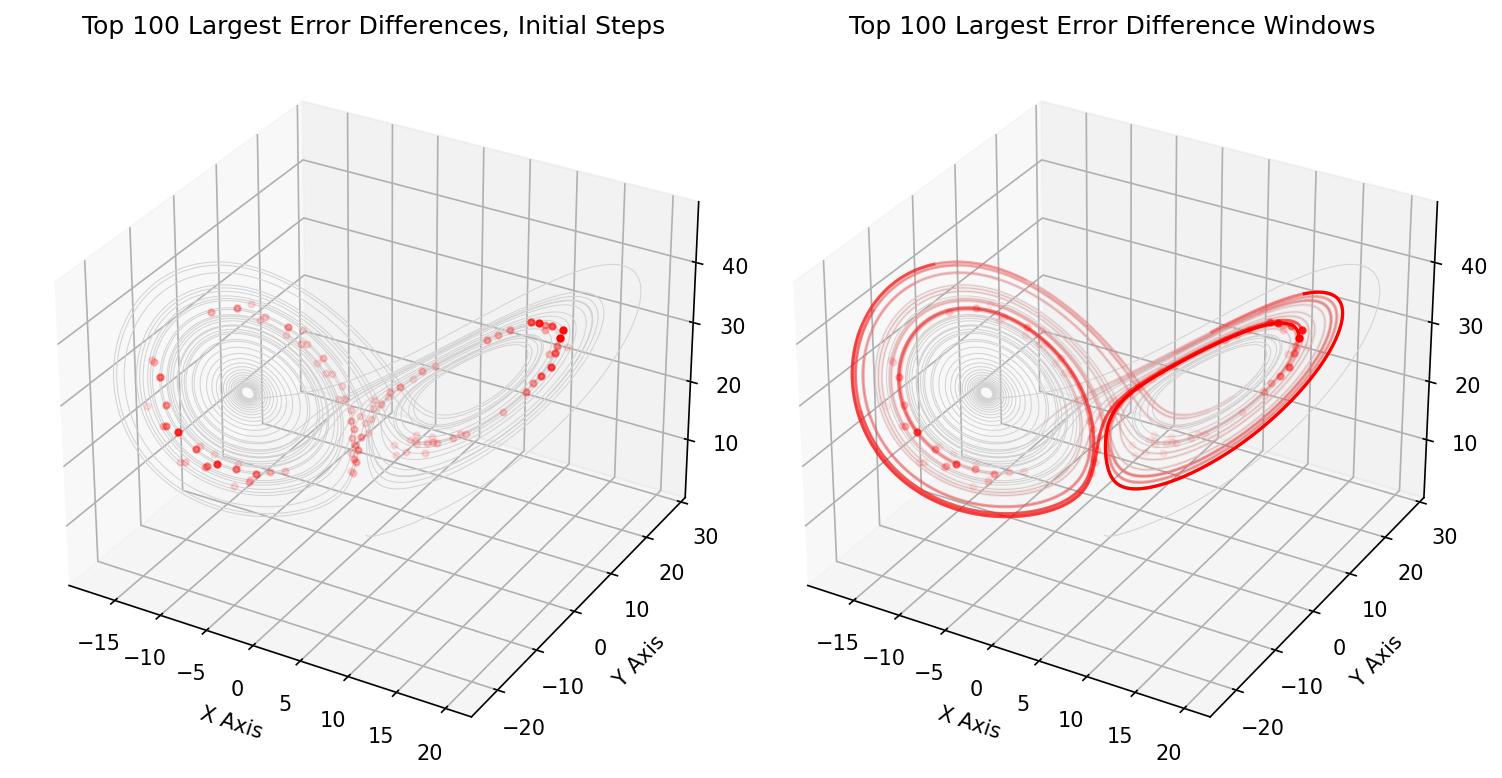

In [20]:
Image("./Images_Project_1/q1_lorenz3d_step25_double.png", width=850)

These graphs show the 100 intervals with the largest difference in error. They are distributed more evenly throughout the trajectory, but we can still see that the full trajectories they describe seem to be switching between the attractors. We can check the range of the mean difference for these 100 windows below, and we see that it looks very similar to the 10 largest error windows for the 250 step intervals. This suggests that 250 steps accurately represented the non-linearity of the system. 

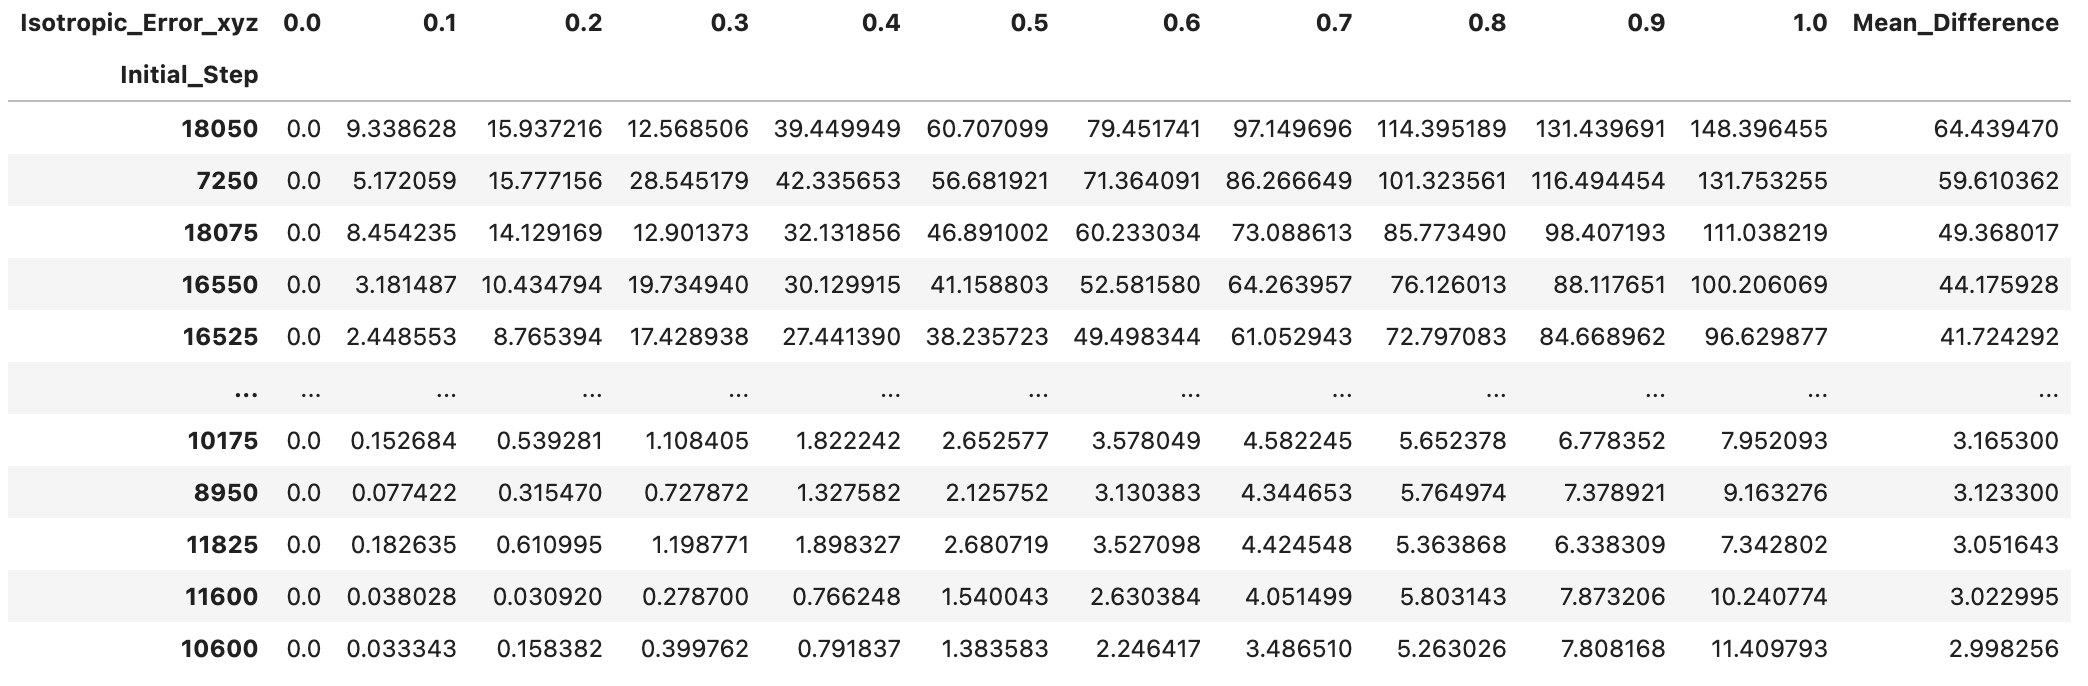

In [27]:
Image("./Images_Project_1/q1_table_top100.png", width = 1100)

We can finally look at the average error along the different isotropic error values. This will give us an idea of how the forecast error and non-linear behavior increases with greater perturbations. The following table and figure summarize these results. There is a relatively stable relationship between increasing the perturbation from an isotropic error and the cumlative addition to the discrepancy between forecast error and the linear model of forecast error. This is a reasonable correlation between increasing initial isotropic error and the resultant linear model performance, but it is surprising that the error does not grow more exponentially (even with larger perturbations up to 10.0). This could mean that error in initial conditions will grow exponentially, but the discrepancy between a linear model prediction and the actual propogated error might grow more linearly. 

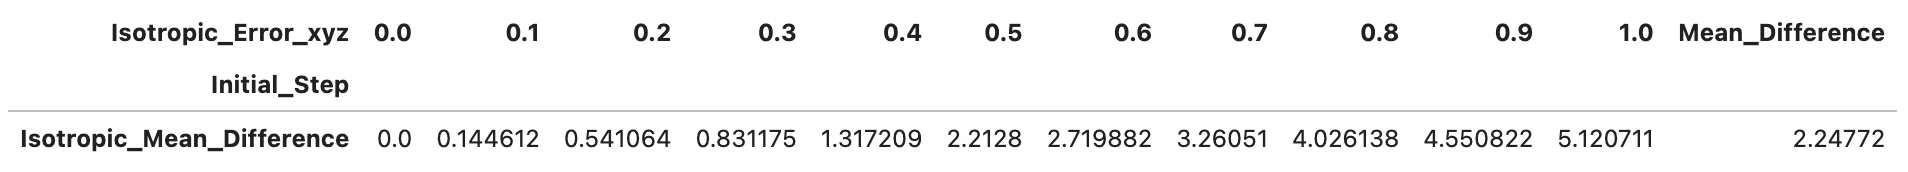

In [29]:
Image("./Images_Project_1/q1_table_isotropic_mean.png", width = 1100)

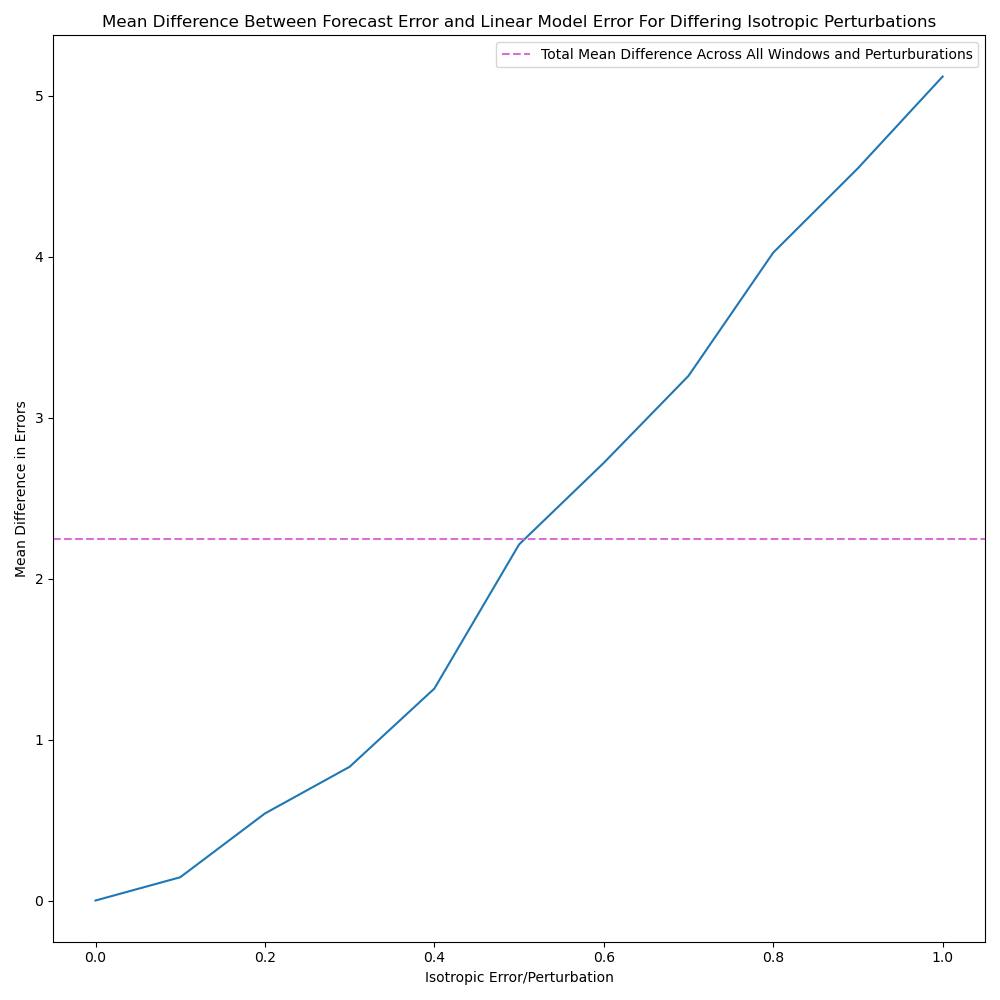

In [35]:
Image('./Images_Project_1/q1_mean_perturbation.png', width = 800)

#### **Summary for Question 1** ####
The linear models accurately approximated the forecast error for the Lorenz 63 model for the majority of the 500 step windows along the trajectory. It performed very well in most of space, including model runs with much higher initial perturbations, but there were a collection of windows along the trajectory where the discrepancy between the linear model's prediciton and the propogated model error became very large; this discrepancy also tended to grow with increased initial condition error. 

These regions and windows are documented above; they generally indicate highly non-linear sections of the trajectory because the tangent linear model has a difficult time accurately representing the behavior of these sections. When we looked at the initial steps and intervals for these sections, there was a clear correlation that the most non-linear sections tended to pass through "center" of the two lobes where the state of the Lorenz 63 model is rapidly switching between the attractors of the system. 

---
---

## Question 2 ##

Repeat the above calculations from (1), but change the amount of time used to compute the
propagator matrix (i.e., decrease and increase $t_f$ with variable fcst_len). How does this change
your results from above?

---

We can use the same process as question 1 with an added layer of iteration to vary the forecast length. For this question, an interval of 250 steps between windows will be used again, as the results in question 1 showed this spatial frequency is informative – even if it misses some granularity.

#### Expectations ####
We might expect the error difference in the models to increase consistently with the size of the forecast length because linearizing over longer intervals will both lose a lot of information to the process and increase the likelihood of encountering a highly non-linear regime in the window. For example, a 